# Q. 1. and 2
1. Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together. 

2. Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown.  


*In markdown, and mapper.py and reducer.py files*

# Q. 3.
Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization

In [25]:
import pandas as pd
import re
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [2]:
# gutenberg corpus
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
# loading Paradise Lost text as words
par_words = nltk.corpus.gutenberg.words('milton-paradise.txt')
par_words

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [7]:
#stop words are common words that have low information value
#generally, we want to get rid of these stop words
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
# using list comprehension(LC) to lower the wordcase from list paradise words
lower_case = [i.lower() for i in par_words]

In [9]:
#remove stop words
cleaned_par = [j for j in lower_case if j not in stop_words]

In [13]:
import nltk
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [14]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemma_sent = [lemmatizer.lemmatize(i) for i in cleaned_par]
# counting bag of words using counter
from collections import Counter
bag_words = Counter(lemma_sent)

# printing 20 words which are the most commom
print(bag_words.most_common(20))

[(',', 10198), (';', 2317), ('.', 1254), (':', 748), ("'", 595), ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('-', 334), ('thus', 318), ('god', 316), ('?', 301), ('shall', 283), ('!', 251), ('yet', 228), ('earth', 217), ('though', 217), ('u', 187), ('man', 176)]


Using lemmatizing as lemmatization considers the context AND converts the word to "meaningful base form" (a lemma). We also have some punctuation and 'useless' words in our top 20 so will do some more preprocessing

In [15]:
#removing punctuations

alpha_only = [i for i in lemma_sent if i.isalnum()]

In [16]:
# remove meaning less words like th, u. 
meaningless = ['th','u','thus','though','thou','yet','thee','thy']

# removing these words from our alphanumeric only list
final_words = [i for i in alpha_only if i not in meaningless]

In [18]:
lemma_sent = [lemmatizer.lemmatize(i) for i in final_words]
lemma_sent = [i.capitalize() for i in lemma_sent]

# counting bag of words using counter
bag_words = Counter(lemma_sent)

# printing 20 words which are the most commom
print(bag_words.most_common(20))

[('Heaven', 436), ('God', 316), ('Shall', 283), ('Earth', 217), ('Man', 176), ('First', 175), ('Day', 157), ('High', 153), ('One', 142), ('Son', 132), ('Far', 129), ('Death', 127), ('May', 126), ('Power', 125), ('Great', 123), ('Till', 120), ('Like', 120), ('World', 119), ('Hell', 119), ('Thing', 116)]


In [19]:
#since the bag of words is a tuple we will unzip it to plot the histogram
bow_20 = bag_words.most_common(20)
words, count = zip(*bow_20)
print(words)
print(count)

('Heaven', 'God', 'Shall', 'Earth', 'Man', 'First', 'Day', 'High', 'One', 'Son', 'Far', 'Death', 'May', 'Power', 'Great', 'Till', 'Like', 'World', 'Hell', 'Thing')
(436, 316, 283, 217, 176, 175, 157, 153, 142, 132, 129, 127, 126, 125, 123, 120, 120, 119, 119, 116)


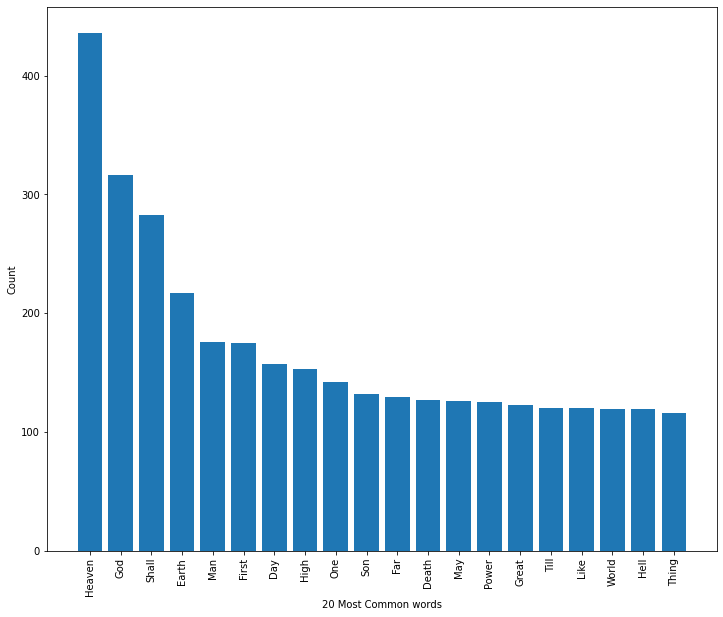

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.bar(words,count)
plt.xlabel("20 Most Common words")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

# Q. 4.
Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.  

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
read = nltk.corpus.gutenberg.open('milton-paradise.txt')

sentiments = []

for line in read:
    sentiment = analyzer.polarity_scores(line)
    compound = sentiment["compound"]
    pos = sentiment['pos']
    neu = sentiment['neu']
    neg = sentiment['neg']

    sentiments.append({
                "text":line,
                "compound":compound,
                "positive":pos,
                "negative":neg,
                "neutral":neu
    })

sentiments_df = pd.DataFrame(sentiments)

print("TOP 5 POSITIVE SENTENCES")
sentiments_df.sort_values('positive',ascending=False)[['text','positive']].head()

TOP 5 POSITIVE SENTENCES


,text,positive
1571,"I pleased, and with attractive graces won \n",0.858
608,"Of dauntless courage, and considerate pride \n",0.855
7267,"She fair, divinely fair, fit love for Gods! \n",0.838
2211,"With joy and peace triumphing, and fair truth. \n",0.835
6299,"Intelligence of Heaven, Angel serene! \n",0.829


In [27]:
print("TOP 5 NEGATIVE SENTENCES")
sentiments_df.sort_values('negative',ascending=False)[['text','negative']].head()

TOP 5 NEGATIVE SENTENCES


,text,negative
5406,"Exhausted, spiritless, afflicted, fallen. \n",1.000
916,"Desperate revenge, and battle dangerous \n",0.919
510,"Exposed a matron, to avoid worse rape. \n",0.850
1305,O shame to men! Devil with devil damned \n,0.831
10381,"On penalty of death, and suffering death; \n",0.822


In [28]:
print("TOP 5 NEUTRAL SENTENCES")
sentiments_df.sort_values('neutral',ascending=False)[['text','neutral']].head()

TOP 5 NEUTRAL SENTENCES


,text,neutral
5317,Sat eagle-winged; beside him hung his bow \n,1.0
5762,Capacious bed of waters: Thither they \n,1.0
5777,"All but within those banks, where rivers now \n",1.0
5775,And on the washy oose deep channels wore; \n,1.0
5774,"With serpent errour wandering, found their way...",1.0


# Q. 5.
Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.  

We can see that the sentiment analysis was in fact, correct. It was correctly able to distinguish between positive (Courage, Gods, Heaven, Truth, triumph), negative (exhausted, revenge, devil, rape, death) and neutral words (eagle-winged, banks, serpent, rivers)

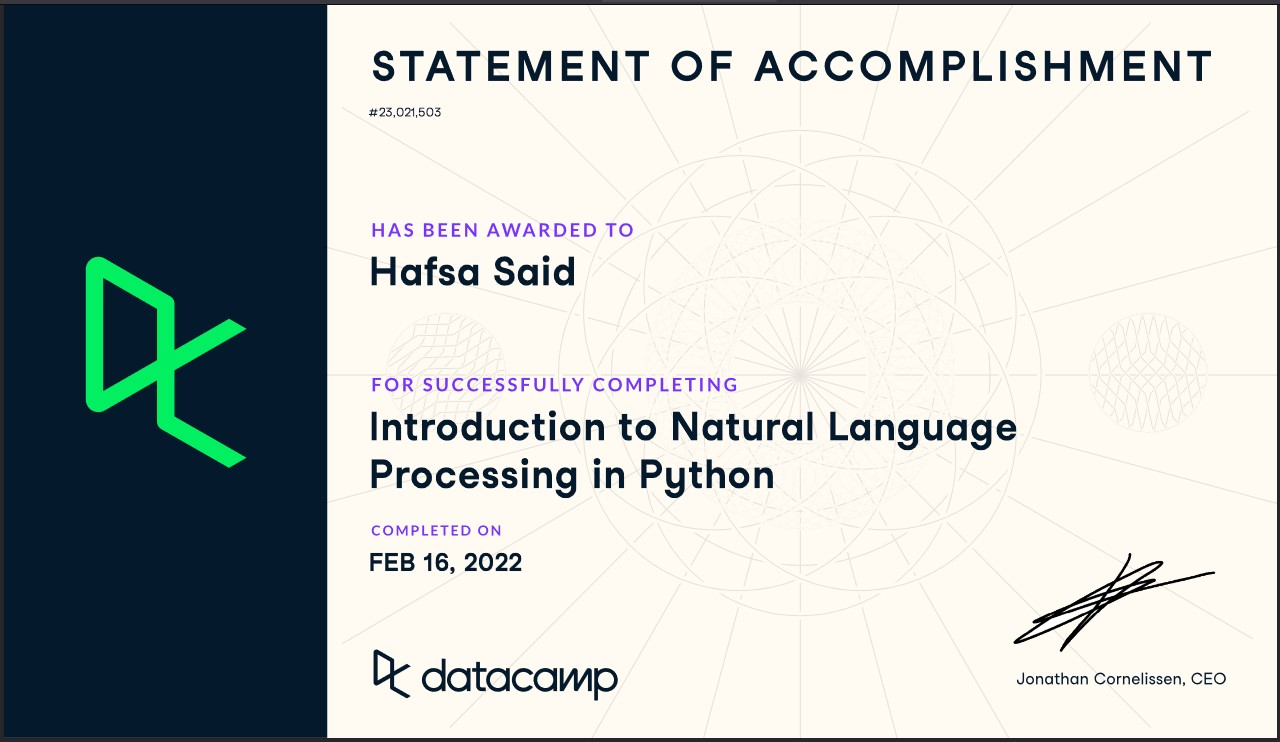